<a href="https://colab.research.google.com/github/kellyluu94/machine-learning/blob/main/Financial_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import os

import nltk
import pandas as pd


In [40]:
def transform_stocker_bot_data():
  stocker_bot['timestamp'] = pd.to_datetime(stocker_bot['timestamp'])
  stocker_bot['company_names'] = stocker_bot['company_names'].astype('category')
  stocker_bot['source'] = stocker_bot['source'].astype('category')
  stocker_bot['symbols'] = stocker_bot['symbols'].astype('category')

stocks = pd.read_csv("stocks_cleaned.csv")
stocker_bot = pd.read_csv("stockerbot-export.csv", on_bad_lines='skip')
transform_stocker_bot_data()
stocker_bot.dtypes

id                             int64
text                          object
timestamp        datetime64[ns, UTC]
source                      category
symbols                     category
company_names               category
url                           object
verified                        bool
dtype: object

In [29]:
stocker_bot['timestamp'].describe()
stocker_bot['timestamp'].dt.date.value_counts().sort_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


2018-02-23        1
2018-07-08       20
2018-07-09      657
2018-07-10      920
2018-07-11     1010
2018-07-12     1562
2018-07-13     1456
2018-07-14     1071
2018-07-15     2084
2018-07-16     3085
2018-07-17     5076
2018-07-18    11314
2018-07-19        8
Name: timestamp, dtype: int64

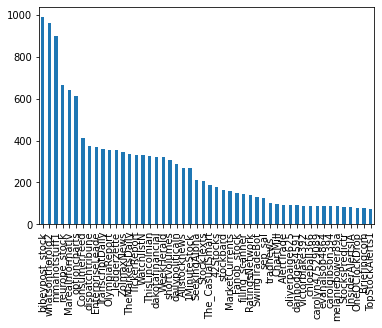

In [32]:
stocker_bot['source'].value_counts().head(50).plot.bar()

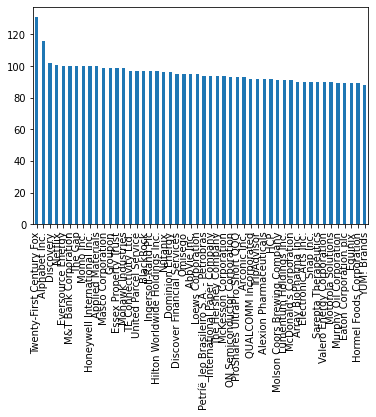

In [38]:
stocker_bot['company_names'].value_counts().head(50).plot.bar()

In [52]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
stocker_bot[['neg', 'neu', 'pos', 'compound']] = stocker_bot['text'].apply(sid.polarity_scores).apply(pd.Series)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
